In [33]:
import numpy as np
import pandas as pd
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv(r'C:\Users\gooyh\Desktop\Personal\MBA\MKT_596\reviews_data.csv')
df

,Name,Branch,Date,Rate,Review
0,Catalina Valeriana,109 North St,Jan. 2026,1,"The food is good, but they always mess up my o..."
1,Giorgi Gvadzabia,109 North St,Jan. 2026,4,NaN
2,Nicole Viola,109 North St,Dec. 2025,5,"Manager knows her stuff, not emotional no atti..."
3,Sargis Margaryan,109 North St,Dec. 2025,4,Parking space good
4,Misbah Ellahi,109 North St,Nov. 2025,5,NaN
...,...,...,...,...,...
75,Ashley Goetz,67 Newtown Rd,Jul. 2025,5,NaN
76,Aaron “Double A” Preudhomme,67 Newtown Rd,Jul. 2025,2,I'm really not sure what happened but this pla...
77,David Lopez,67 Newtown Rd,Jun. 2025,5,NaN
78,Robbi Mintz,67 Newtown Rd,Apr. 2025,2,The restaurant was so dirty. The bathroom was ...


In [35]:
boxplot = df.hvplot.box('Rate', by='Branch', cmap=['#1f77b4', '#ff7f0e', '#2ca02c'], width = 700, height=400,
                       title='Customer Rating Distribution by Branch')
boxplot

:BoxWhisker   [Branch]   (Rate)

In [36]:
df['Date'] = pd.to_datetime(df['Date'], format='%b. %Y')

In [37]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df = df.sort_values('Date')
df

,Name,Branch,Date,Rate,Review,Month
54,Isabella Rose,113 Mill Plain Rd,2025-02-01,5,Very nice atmosphere! Well stocked with mercha...,2025-02
28,Alexandra Haughey,109 North St,2025-02-01,5,"Nice Starbucks, they have a drive thru. Can ge...",2025-02
27,Marcos Jimenez.,109 North St,2025-02-01,5,NaN,2025-02
56,Kevin Wheeler,113 Mill Plain Rd,2025-02-01,4,A Starbucks,2025-02
55,Danielle,113 Mill Plain Rd,2025-02-01,5,NaN,2025-02
...,...,...,...,...,...,...
63,Robert Pinto,67 Newtown Rd,2025-12-01,5,I love this Starbucks! Sarah and Holly are alw...,2025-12
57,Violeta Francese,67 Newtown Rd,2026-01-01,3,"Staff was extremely friendly, coffee was perfe...",2026-01
29,Brian Hernandez,113 Mill Plain Rd,2026-01-01,1,"The little rude brunette girl, and the staff, ...",2026-01
1,Giorgi Gvadzabia,109 North St,2026-01-01,4,NaN,2026-01


In [38]:
monthly_avg = df.groupby(['Branch','Month'])['Rate'].mean().reset_index()
monthly_avg

,Branch,Month,Rate
0,109 North St,2025-02,5.000000
1,109 North St,2025-03,2.333333
2,109 North St,2025-04,5.000000
3,109 North St,2025-05,3.333333
4,109 North St,2025-06,5.000000
5,109 North St,2025-07,5.000000
6,109 North St,2025-08,5.000000
7,109 North St,2025-09,5.000000
8,109 North St,2025-10,4.500000
9,109 North St,2025-11,3.666667


In [39]:
line = monthly_avg.hvplot.line(aggregator='mean', by='Branch', width=800, height=400, line_width=3,
                     rot=45, x='Month', y='Rate',title='Monthly Average Rating Trend by Branch')
line

:NdOverlay   [Branch]
   :Curve   [Month]   (Rate)

In [40]:
monthly_avg['Rate_smooth'] = (
    monthly_avg.groupby('Branch')['Rate']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [41]:
smooth_line = monthly_avg.hvplot.line(aggregator='mean', by='Branch', width=800, height=400, line_width=3,
                     rot=45, x='Month', y='Rate_smooth',title='Monthly Average Rating Trend by Branch')
smooth_line

:NdOverlay   [Branch]
   :Curve   [Month]   (Rate_smooth)

In [42]:
low_review = df[df['Rate']<=2].copy()
low_review

,Name,Branch,Date,Rate,Review,Month
79,dude nice,67 Newtown Rd,2025-03-01,1,Baristas are great. Management and corporate l...,2025-03
25,Tania Correa,109 North St,2025-03-01,1,Took one sip and noticed the cold foam to actu...,2025-03
24,Emmy Tomboy,109 North St,2025-03-01,1,I placed an order around 20 minutes in advance...,2025-03
78,Robbi Mintz,67 Newtown Rd,2025-04-01,2,The restaurant was so dirty. The bathroom was ...,2025-04
20,b da,109 North St,2025-05-01,1,"rude, no flavor.",2025-05
76,Aaron “Double A” Preudhomme,67 Newtown Rd,2025-07-01,2,I'm really not sure what happened but this pla...,2025-07
45,Veronica Velez,113 Mill Plain Rd,2025-08-01,1,My order is always prepared wrong. You have to...,2025-08
73,Jennifer Rowan,67 Newtown Rd,2025-08-01,1,"if i could give this place 0 stars i would, ma...",2025-08
72,P,67 Newtown Rd,2025-08-01,1,I went today to grab a spicy falafel pocket. W...,2025-08
71,败木,67 Newtown Rd,2025-08-01,2,"today，When I was ordering, they just kept chat...",2025-08


In [43]:
import re
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

low_review['clean_review'] = low_review['Review'].apply(clean_text)

In [44]:
from collections import Counter

all_words = " ".join(low_review['clean_review']).split()
word_counts = Counter(all_words)
word_counts.most_common(40)

[('the', 45),
 ('i', 43),
 ('and', 38),
 ('to', 29),
 ('a', 28),
 ('my', 17),
 ('was', 17),
 ('it', 16),
 ('not', 12),
 ('coffee', 12),
 ('is', 12),
 ('in', 12),
 ('for', 12),
 ('but', 12),
 ('they', 11),
 ('at', 9),
 ('one', 8),
 ('this', 8),
 ('order', 8),
 ('with', 8),
 ('get', 7),
 ('minutes', 7),
 ('drink', 7),
 ('be', 7),
 ('me', 7),
 ('so', 6),
 ('of', 6),
 ('back', 6),
 ('you', 6),
 ('while', 5),
 ('out', 5),
 ('if', 5),
 ('have', 4),
 ('work', 4),
 ('ordered', 4),
 ('up', 4),
 ('barista', 4),
 ('when', 4),
 ('attitude', 4),
 ('customer', 4)]

In [45]:
branch_keywords = (
    low_review.groupby('Branch')['clean_review']
    .apply(lambda x: Counter(" ".join(x).split()).most_common(10))
)
branch_keywords

Branch
109 North St         [(the, 21), (i, 18), (a, 17), (and, 9), (to, 9...
113 Mill Plain Rd    [(and, 9), (the, 7), (to, 4), (i, 4), (order, ...
67 Newtown Rd        [(i, 21), (and, 20), (the, 17), (to, 16), (a, ...
Name: clean_review, dtype: object

In [46]:
df['clean_review'] = df['Review'].apply(clean_text)
low_review['clean_review'] = low_review['Review'].apply(clean_text)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), min_df=2)
X = vectorizer.fit_transform(low_review['clean_review'])
ngrams = vectorizer.get_feature_names_out()

sum_words = X.sum(axis=0)
ngram_freq = [(ngrams[i], sum_words[0, i]) for i in range(len(ngrams))]
sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:20]

[('and the', 4),
 ('to be', 4),
 ('it was', 3),
 ('my order', 3),
 ('to get', 3),
 ('with the', 3),
 ('and get', 2),
 ('and it', 2),
 ('and not', 2),
 ('and they', 2),
 ('at least', 2),
 ('at the', 2),
 ('but they', 2),
 ('but this', 2),
 ('coffee and', 2),
 ('for my', 2),
 ('get coffee', 2),
 ('good but', 2),
 ('have to', 2),
 ('in the', 2)]

In [48]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(low_review['clean_review'])
words = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

df_wc = pd.DataFrame({
    'word': words,
    'count': counts,
})
df_wc = df_wc.sort_values('count', ascending=False).reset_index(drop=True)

In [49]:
np.random.seed(42)
df_wc['x'] = np.random.rand(len(df_wc))
df_wc['y'] = np.random.rand(len(df_wc))


In [50]:
df_wc['font_size'] = (df_wc['count'] / df_wc['count'].max()) * 30 + 10
df_wc['font_size'] = df_wc['font_size'].astype(int).astype(str) + 'pt'

In [51]:
palette = plt.cm.tab20(np.linspace(0, 1, 20))
palette_hex = ['#%02x%02x%02x' % tuple((c[:3] * 255).astype(int)) for c in palette]

In [52]:
alpha = (df_wc['count'] / df_wc['count'].max()) * 0.8 + 0.2
colors = []
for i, row in df_wc.iterrows():
    base = np.random.choice(palette_hex)
    colors.append(base + f"{int(alpha.iloc[i]*255):02x}")

df_wc['color'] = colors

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
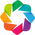

In [53]:
import holoviews as hv
hv.extension('bokeh')

In [54]:
palette = plt.cm.tab20(np.linspace(0, 1, 20))
palette_hex = ['#%02x%02x%02x' % tuple((c[:3] * 255).astype(int)) for c in palette]

# 단어마다 랜덤 색상 배정
df_wc['color'] = np.random.choice(palette_hex, size=len(df_wc))

In [55]:
labels = hv.Labels(
    df_wc,
    kdims=['x', 'y'],
    vdims=['word', 'count', 'font_size', 'color']
).opts(
    text_font_size='font_size',
    text_color='color',
    width=900,
    height=600,
    tools=['hover'],
    xaxis=None,
    yaxis=None,
    title='Interactive Word Cloud (Colored)'
)

labels

:Labels   [x,y]   (word,count,font_size,color)

In [56]:
def make_wordcloud(df_branch, branch_name):
    # CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df_branch['clean_review'])

    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1

    df_wc = pd.DataFrame({
        'word': words,
        'count': counts
    })

    # 큰 단어 먼저
    df_wc = df_wc.sort_values('count', ascending=False).reset_index(drop=True)

    # 랜덤 위치
    np.random.seed(42)
    df_wc['x'] = np.random.rand(len(df_wc))
    df_wc['y'] = np.random.rand(len(df_wc))

    # 크기 스케일링
    df_wc['font_size'] = (df_wc['count'] / df_wc['count'].max()) * 30 + 10
    df_wc['font_size'] = df_wc['font_size'].astype(int).astype(str) + 'pt'

    # 색상 팔레트
    palette = plt.cm.tab20(np.linspace(0, 1, 20))
    palette_hex = ['#%02x%02x%02x' % tuple((c[:3] * 255).astype(int)) for c in palette]

    # alpha 적용
    alpha = (df_wc['count'] / df_wc['count'].max()) * 0.8 + 0.2
    colors = []
    for i, row in df_wc.iterrows():
        base = np.random.choice(palette_hex)
        colors.append(base + f"{int(alpha.iloc[i]*255):02x}")

    df_wc['color'] = colors

    # Holoviews Labels
    labels = hv.Labels(
        df_wc,
        kdims=['x', 'y'],
        vdims=['word', 'count', 'font_size', 'color']
    ).opts(
        text_font_size='font_size',
        text_color='color',
        width=900,
        height=600,
        tools=['hover'],
        xaxis=None,
        yaxis=None,
        title=f'Word Cloud for Branch: {branch_name}'
    )

    return labels


In [57]:
branches = low_review['Branch'].unique()

plots = []
for b in branches:
    df_b = low_review[low_review['Branch'] == b]
    plots.append(make_wordcloud(df_b, b))

hv.Layout(plots).cols(1)

:Layout
   .Labels.I   :Labels   [x,y]   (word,count,font_size,color)
   .Labels.II  :Labels   [x,y]   (word,count,font_size,color)
   .Labels.III :Labels   [x,y]   (word,count,font_size,color)

In [58]:
branch_avg_rate = df.groupby('Branch')['Rate'].mean()    #sum of rate by branch divided by number of reviews
low_flag = df['Rate'] <= 2
branch_low_ratio = low_flag.groupby(df['Branch']).mean()   

# low_review['clean_review'] 기준
low_review['n_words'] = low_review['clean_review'].str.split().str.len()
branch_complaint_density = low_review.groupby('Branch')['n_words'].mean()


In [59]:
branch_avg_rate

Branch
109 North St         4.103448
113 Mill Plain Rd    4.071429
67 Newtown Rd        3.478261
Name: Rate, dtype: float64

In [60]:
branch_low_ratio

Branch
109 North St         0.206897
113 Mill Plain Rd    0.142857
67 Newtown Rd        0.391304
Name: Rate, dtype: float64

In [61]:
branch_complaint_density

Branch
109 North St         67.000000
113 Mill Plain Rd    38.000000
67 Newtown Rd        48.222222
Name: n_words, dtype: float64

In [62]:
import panel as pn
pn.extension()

branch_selector = pn.widgets.Select(
    name='Branch',
    options=sorted(df['Branch'].unique())
)

In [63]:
def metrics(branch):
    df_b = df[df['Branch'] == branch]
    low_b = df_b[df_b['Rate'] <= 2]

    avg_rate = df_b['Rate'].mean()
    low_ratio = (df_b['Rate'] <= 2).mean()
    complaint_density = low_b['clean_review'].str.split().str.len().mean()

    return pn.pane.Markdown(
        f"""
        ### 📊 Metrics for **{branch}**
        - **Average Rating:** {avg_rate:.2f}
        - **Low Rating Ratio:** {low_ratio:.2%}
        - **Complaint Density:** {complaint_density:.2f}
        """
    )

In [64]:
boxplot = df.hvplot.box(
    y='Rate',
    by='Branch',
    title='Rating Distribution by Branch',
    height=300
)

lineplot = df.groupby(['Date', 'Branch'])['Rate'].mean().reset_index().hvplot.line(
    x='Date',
    y='Rate',
    by='Branch',
    title='Rating Trend Over Time',
    height=300
)

@pn.depends(branch_selector)
def wc(branch):
    df_b = low_review[low_review['Branch'] == branch]
    return make_wordcloud(df_b, branch)


In [65]:
dashboard = pn.Column(
    "# ⭐ Review Analysis Dashboard",
    pn.Row(branch_selector),
    pn.Row(boxplot, lineplot),
    pn.layout.Divider(),
    pn.Row(
        pn.Column(pn.bind(metrics, branch_selector)),
        pn.Column(wc)
    )
)

dashboard.servable()

Column
    [0] Markdown(str)
    [1] Row
        [0] Select(name='Branch', options=['109 North St', ...], value='109 North St')
    [2] Row
        [0] HoloViews(BoxWhisker, height=300, sizing_mode='fixed', width=700)
        [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed', width=700)
    [3] Divider()
    [4] Row
        [0] Column
            [0] ParamFunction(function, _pane=Markdown, defer_load=False)
        [1] Column
            [0] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [67]:
# cd C:\Users\gooyh\MBA
# panel serve MKT_analysis.ipynb --autoreload
